In [1]:
import numpy as np

class Perceptron: #class created to work Object Oriented Programming where there is an object that we can do different functions within this obj like the perceptron(fit,predict, act funct)
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y): #when we create a class and we define a function in this class the first variable will always be self which meanse we are still in the same class
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand(1)

        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                error = target - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self._activation(weighted_sum)
    def _activation(self, z):
        return 1 if z >= 0 else 0 #advance writing way of (if else) which is comprehensive list way not the beginner way

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
# Load the Iris dataset
iris = load_iris()

# Access the features and target variables
X = iris.data[:,:2] # take all rows but only the first 2 columns

y = np.where(iris.target!=0, 0, 1) # this is if cond: if iris.target not equal to 0 put 0 else put 1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [8]:
# Create a perceptron with two input features
perceptron = Perceptron(learning_rate=0.1, epochs=10)

# Train the perceptron on the training data
perceptron.fit(X_train, y_train)

# Get predictions from the test set
y_pred = np.array([perceptron.predict(x) for x in X_test])

# Generate the classification report to get all  metrics
report = classification_report(
  y_test, y_pred, 
  target_names=[
    'Iris-setosa', 
    'Iris-other'
  ]
)

print(report)

              precision    recall  f1-score   support

 Iris-setosa       1.00      0.89      0.94        19
  Iris-other       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.93        30
weighted avg       0.94      0.93      0.93        30



## As we will see in the diagram below, Perceptron is only helpful for linearly classified classes

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

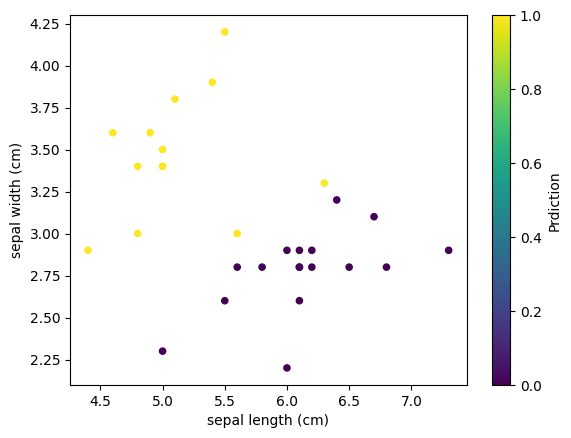

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(X_test, columns=iris.feature_names[:2])
df['Prdiction'] = y_pred

df.plot.scatter(
    x='sepal length (cm)',
    y='sepal width (cm)',
    c='Prdiction',
    colormap='viridis'
)